<a href="https://colab.research.google.com/github/ZahraVakil/BhratIntern_DataScienceTasks/blob/main/TitanicSurvival_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
titanic_train = pd.read_csv('titanic_train.csv')
titanic_test = pd.read_csv('titanic_test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Doing EDA -- Understanding structure of data

In [5]:
titanic_train.shape   #rows,cols

(891, 12)

In [7]:
titanic_train['Survived'].value_counts()  #1-survived 0-not survived

0    549
1    342
Name: Survived, dtype: int64

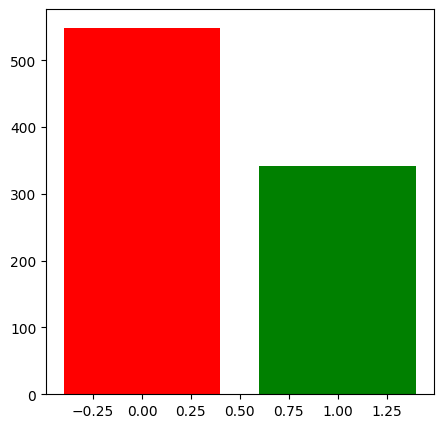

In [9]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()), list(titanic_train['Survived'].value_counts()), color=['r','g'])
plt.show()

In [10]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

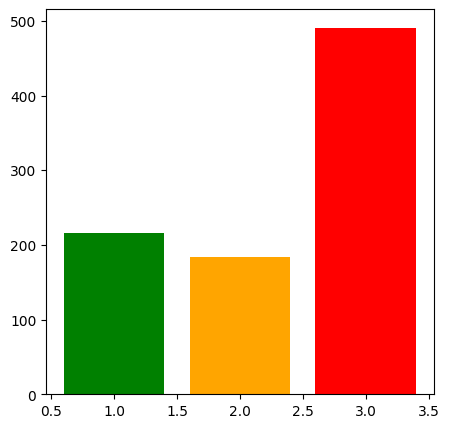

In [12]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()), list(titanic_train['Pclass'].value_counts()), color=['r','g','orange'])
plt.show()

In [14]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

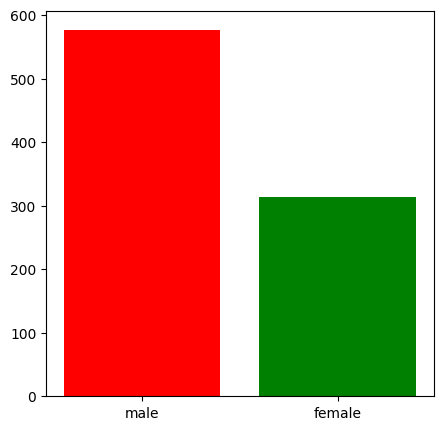

In [15]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()), list(titanic_train['Sex'].value_counts()), color=['r','g'])
plt.show()

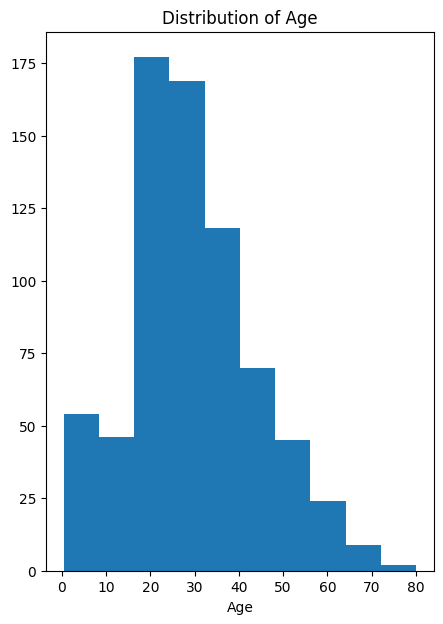

In [16]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()


In [17]:
sum(titanic_train['Survived'].isnull())

0

In [18]:
sum(titanic_train['Age'].isnull())

177

In [19]:
titanic_train = titanic_train.dropna()

In [20]:
sum(titanic_train['Age'].isnull())

0

In [21]:
#independent variable
x_train = titanic_train[['Age']]
#dependent variable
y_train = titanic_train[['Survived']]


**Building Model**

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc = DecisionTreeClassifier()

In [24]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

**Predicting Values**

In [25]:
sum(titanic_test['Age'].isnull())

86

In [26]:
titanic_test = titanic_test.dropna()

In [27]:
x_test = titanic_test[['Age']]

In [28]:
y_pred = dtc.predict(x_test)

In [29]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])